In [85]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

from PIL import Image

import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization, GlobalMaxPooling2D, LayerNormalization
from tensorflow.keras import backend as K

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

print('Done')

Done


In [71]:
## PATH
drive_path = './'

## Classes
num_classes = 12

## Batch Size
batch_size = 64

## Epochs
n_epochs = 64

## Learning rate
learning_rate=0.01

## Train and Test files
train_file = drive_path + 'treino.txt'
test_file = drive_path + 'test.txt'

## Input Image Dimension
img_rows, img_cols = 32, 32

print('Done')

Done


#Funções para ler e preparar a base de dados

In [73]:
## Resize

def resize_data(data, size, convert):

	if convert:
		data_upscaled = np.zeros((data.shape[0], size[0], size[1], 3))
	else:
		data_upscaled = np.zeros((data.shape[0], size[0], size[1]))
	for i, img in enumerate(data):
		large_img = cv2.resize(img, dsize=(size[1], size[0]), interpolation=cv2.INTER_CUBIC)
		data_upscaled[i] = large_img

	#print (np.shape(data_upscaled))
	return data_upscaled
  
print('Done')

Done


In [74]:
## Load Images

def load_images(image_paths, convert=False):

	x = []
	y = []
	for image_path in image_paths:

		path, label = image_path.split(' ')
		
		## Image path
		path=  drive_path + 'data_aug/' + path
		print (path)

		if convert:
			image_pil = Image.open(path).convert('RGB') 
		else:
			image_pil = Image.open(path).convert('L')

		img = np.array(image_pil, dtype=np.uint8)

		x.append(img)
		y.append([int(label)])

	x = np.array(x)
	y = np.array(y)

	if np.min(y) != 0: 
		y = y-1

	return x, y

print('Done')

Done


In [75]:
## Load Dataset

def load_dataset(train_file, test_file, resize, convert=False, size=(224,224)):

	arq = open(train_file, 'r')
	texto = arq.read()
	train_paths = texto.split('\n')
	
	print ('Size:', size)

	train_paths.remove('') # Remove empty lines
	train_paths.sort()

	print ("Loading training set...")
	x_train, y_train = load_images(train_paths, convert)
 
	arq = open(test_file, 'r')
	texto = arq.read()
	test_paths = texto.split('\n')

	test_paths.remove('') # Remove empty lines
	test_paths.sort()
 
	print ("Loading testing set...")
	x_test, y_test = load_images(test_paths, convert)

	if resize:
		print ("Resizing images...")
		x_train = resize_data(x_train, size, convert)
		x_test = resize_data(x_test, size, convert)

	if not convert:
		x_train = x_train.reshape(x_train.shape[0], size[0], size[1], 1)
		x_test = x_test.reshape(x_test.shape[0], size[0], size[1], 1)

	print (np.shape(x_train))
	return (x_train, y_train), (x_test, y_test)
 
print('Done')

Done


# **1. Carregando as bases de treino e teste**

In [76]:
print ("Loading database...")

## Gray Scale
input_shape = (img_rows, img_cols, 1)
(x_train, y_train), (x_test, y_test) = load_dataset(train_file, test_file, resize=True, convert=False, size=(img_rows, img_cols))

## RGB
# input_shape = (img_rows, img_cols, 3)
# (x_train, y_train), (x_test, y_test) = load_dataset(train_file, test_file, resize=True, convert=True, size=(img_rows, img_cols))

## Save for the confusion matrix
label = []
for i in range(len(x_test)):
	label.append(y_test[i][0])

## Normalize images
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
#print ('\n','x_train shape:', x_train.shape)

print ('\n',x_train.shape[0], 'train samples')
print ('\n',x_test.shape[0], 'test samples')


## Convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


/td0067_rot_3.jpg
./data_aug/td0067_vertical.jpg
./data_aug/td0068.jpg
./data_aug/td0068_horizontal.jpg
./data_aug/td0068_rot_1.jpg
./data_aug/td0068_rot_2.jpg
./data_aug/td0068_rot_3.jpg
./data_aug/td0068_vertical.jpg
./data_aug/td0069.jpg
./data_aug/td0069_horizontal.jpg
./data_aug/td0069_rot_1.jpg
./data_aug/td0069_rot_2.jpg
./data_aug/td0069_rot_3.jpg
./data_aug/td0069_vertical.jpg
./data_aug/td0070.jpg
./data_aug/td0070_horizontal.jpg
./data_aug/td0070_rot_1.jpg
./data_aug/td0070_rot_2.jpg
./data_aug/td0070_rot_3.jpg
./data_aug/td0070_vertical.jpg
./data_aug/td0071.jpg
./data_aug/td0071_horizontal.jpg
./data_aug/td0071_rot_1.jpg
./data_aug/td0071_rot_2.jpg
./data_aug/td0071_rot_3.jpg
./data_aug/td0071_vertical.jpg
./data_aug/td0072.jpg
./data_aug/td0072_horizontal.jpg
./data_aug/td0072_rot_1.jpg
./data_aug/td0072_rot_2.jpg
./data_aug/td0072_rot_3.jpg
./data_aug/td0072_vertical.jpg
./data_aug/td0073.jpg
./data_aug/td0073_horizontal.jpg
./data_aug/td0073_rot_1.jpg
./data_aug/td0073_

In [70]:
# DATA AUGMENTATION
train_file = './train.txt'
save_train_file = './treino.txt'

arq = open(train_file, 'r')
texto = arq.read()
train_paths = texto.split('\n')

save_file = open(save_train_file, 'w')

train_paths.remove('') # Remove empty lines
train_paths.sort()

for image_path in train_paths:
    path, label = image_path.split(' ')
    path = drive_path + 'data/' + path

    trash, name, extension = path.split('.')
    image_name = name.split('/')[2]

    #abertura da imagem
    image = Image.open(path)

    # TRANSLAÇÃO
    horizontal_image = image.transpose(Image.FLIP_LEFT_RIGHT)
    vertical_image = image.transpose(Image.FLIP_TOP_BOTTOM)
    

    # ROTAÇÃO
    rot_1 = image.rotate(5)
    rot_2 = image.rotate(10)
    rot_3 = image.rotate(15)


    image.save(f'./data_aug/{image_name}.jpg',format="JPEG")

    horizontal_image.save(f'./data_aug/{image_name}_horizontal.jpg',format="JPEG")
    vertical_image.save(f'./data_aug/{image_name}_vertical.jpg',format="JPEG")

    rot_1.save(f'./data_aug/{image_name}_rot_1.jpg',format="JPEG")
    rot_2.save(f'./data_aug/{image_name}_rot_2.jpg',format="JPEG")
    rot_3.save(f'./data_aug/{image_name}_rot_3.jpg',format="JPEG")


    text = image_name + '.jpg' + ' ' + label + '\n'
    save_file.write(text)

    text = image_name + '_horizontal.jpg' + ' ' + label + '\n'
    save_file.write(text)

    text = image_name + '_vertical.jpg' + ' ' + label + '\n'
    save_file.write(text)

    text = image_name + '_rot_1.jpg' + ' ' + label + '\n'
    save_file.write(text)

    text = image_name + '_rot_2.jpg' + ' ' + label + '\n'
    save_file.write(text)

    text = image_name + '_rot_3.jpg' + ' ' + label + '\n'
    save_file.write(text)

save_file.close()

# **2. Difinindo o modelo de uma CNN**

In [ ]:
# ## Create CNN model
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten()) #gera um vetor de características. Podemos parar aqui e utilizar isso em um outro classificador.

# # a partir daqui nós estamos chegamos na das camadas totalmente conectadas, onde ocorre a classificação em si.
# # 
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax')) #cuidado! Aqui a última saída tem que ser o nosso número de classes e uma função de ativação de softmax (saída é um vetor de probabilidade para cada classe)

# ## Print CNN layers
# print ('Network structure ----------------------------------')

# # for i, layer in enumerate(model.layers):
# # 	print(i,layer.name)
# # 	if hasattr(layer, 'output_shape'):
# # 		print(layer.output_shape)

# model.summary()

# print ('----------------------------------------------------')


In [77]:
def plot_figure(vet_x, vet_y, vet_z, x_label, y_label, plot_title, f_color, f_label, s_color, s_label, stride, filename):
    fig, ax = plt.subplots(figsize=(12, 5))

    ax.plot(vet_x, vet_y, color=f_color, label=f_label)
    ax.plot(vet_x, vet_z, color=s_color, label=s_label)

    ax.set(xlabel=x_label, ylabel=y_label, title=plot_title)
    ax.set_xticks(vet_x[::stride])
    ax.set_xticklabels(vet_x[::stride], rotation=60, ha='right')
    # ax.set_ylim(y_inf,y_aup)
    ax.grid()

    plt.xticks(vet_x)

    # fig.savefig(filename)
    plt.legend()
    plt.show()

# **3. Difinindo o modelo da LeNet-5 CNN**

In [78]:
def LeNet_5():
    ## Create CNN model
    model = Sequential()
    model.add(Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=input_shape, padding='valid')) #C1
    model.add(AveragePooling2D(pool_size=2, strides=2, padding='valid')) #S2
    model.add(Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid')) #C3
    model.add(AveragePooling2D(pool_size=2, strides=2, padding='valid')) #S4
    model.add(Flatten()) #Flatten
    model.add(Dense(120, activation='tanh')) #C5
    model.add(Dense(84, activation='tanh')) #F6
    model.add(Dense(num_classes, activation='softmax')) #Output Layer

    ## Print CNN layers
    print ('Network structure ----------------------------------')

    model.summary()

    print ('----------------------------------------------------')

    model.compile(metrics=['accuracy'], loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=learning_rate))

    return model

In [79]:
def MATT_CNN():
    ## Create CNN model
    model = Sequential()
    model.add(Conv2D(16, kernel_size=5, strides=1,  activation='sigmoid', input_shape=input_shape, padding='valid'))
    model.add(LayerNormalization())
    model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
    model.add(Conv2D(32, kernel_size=3, strides=1, activation='sigmoid', padding='valid'))
    model.add(LayerNormalization())
    model.add(AveragePooling2D(pool_size=4, strides=4, padding='valid'))
    model.add(Flatten()) #Flatten
    model.add(Dense(120, activation='tanh'))
    model.add(Dense(24, activation='tanh'))
    model.add(Dense(num_classes, activation='softmax')) #Output Layer

    ## Print CNN layers
    print ('Network structure ----------------------------------')

    model.summary()

    print ('----------------------------------------------------')

    model.compile(metrics=['accuracy'], loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(learning_rate=learning_rate))

    return model

In [89]:
# model = LeNet_5()
model = MATT_CNN()

## Trains the model
history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=n_epochs, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print ('\n----------------------------------------------------\n')
print ('Test loss:', score[0])
print ('Test accuracy:', score[1])
print ('\n----------------------------------------------------\n')

## Classes predicted
#print (model.predict_classes(x_test)) 

## Classes probability
#print (model.predict_proba(x_test)) 

Network structure ----------------------------------
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
layer_normalization (LayerNo (None, 28, 28, 16)        32        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 32)        4640      
_________________________________________________________________
layer_normalization_1 (Layer (None, 12, 12, 32)        64        
_________________________________________________________________
average_pooling2d_6 (Average (None, 3, 3, 32)          0         
_________________________________________________________________
f

#Matriz de confusão

In [90]:
pred = []
y_pred = model.predict_classes(x_test)
# y_pred = y_prob.argmax(axis=-1)
for i in range(len(x_test)):
	pred.append(y_pred[i])
print('\n')
print (confusion_matrix(label, pred))
print('\n')

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[31  5  0  1  0  1  0  0  1  0  0  0]
 [ 7 22  1  0  1  0  0  0  0  1  0  0]
 [ 0  1 30  0  0  1  0  2  0  0  1  1]
 [ 0  1  1 33  1  0  1  2  0  0  0  0]
 [ 0  1  1  5 29  1  0  1  0  0  0  0]
 [ 5  1  0  1  0 20  0  1  0  0  0  1]
 [ 0  0  0  0  1  1 29  0  0  1  0  0]
 [ 0  1  5  0  0  1  0 19  0  0  0  2]
 [ 0  0  0  1  0  0  0  0 18  3  5  4]
 [ 0  0  0  0  0  0  1  0  0 29  0  0]
 [ 0  0  2  0  0  0  1  0  3  1 27  0]
 [ 0  0  0  0  

#Plotando gráficos

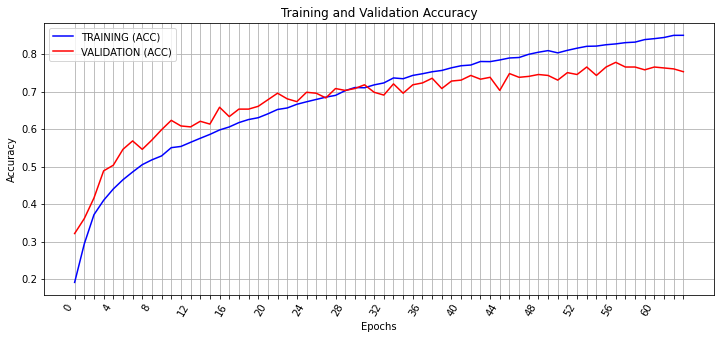

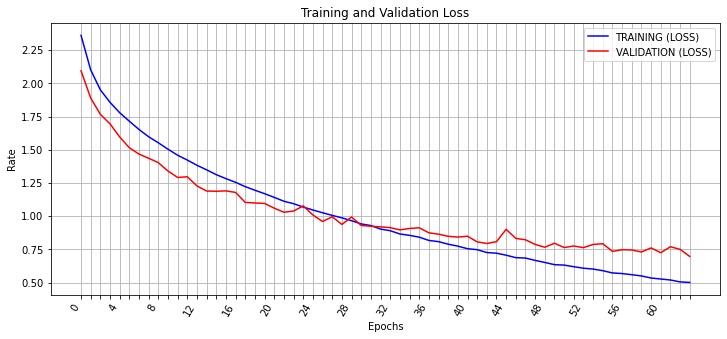

In [91]:
acc = history.history['accuracy'] # history['acc'] / history['accuracy']
val_acc = history.history['val_accuracy'] # history['val_acc'] / history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))

plot_figure(vet_x=epochs, vet_y=acc, vet_z=val_acc, x_label='Epochs', y_label='Accuracy', plot_title='Training and Validation Accuracy', f_color='b', f_label='TRAINING (ACC)', s_color='r', s_label='VALIDATION (ACC)', stride=4, filename='teste')

plot_figure(vet_x=epochs, vet_y=loss, vet_z=val_loss, x_label='Epochs', y_label='Rate', plot_title='Training and Validation Loss', f_color='b', f_label='TRAINING (LOSS)', s_color='r', s_label='VALIDATION (LOSS)', stride=4, filename='teste')
 